In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as  np
from sklearn.datasets import load_iris

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold=KFold(n_splits=5)
cv_accuracy=[]
print('irist 데이터 셋 크기:', features.shape[0])

count=0
for train_index,test_index in kfold.split(features):
    x_train,x_test=features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    
#학습
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    count+=1
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=x_train.shape[0]
    test_size=x_test.shape[0]
    print('{0} 교차 검증 정확도: {1}, 학습데이터 크기:{2}, 검증데이터 크기:{3}'.
         format(count,accuracy,train_size,test_size))
    print('{0}검증 세트 인덱스:{1}'.format(count,test_index))
    cv_accuracy.append(accuracy)

print('검증 정확도 평균:',np.mean(cv_accuracy))
    

irist 데이터 셋 크기: 150
1 교차 검증 정확도: 1.0, 학습데이터 크기:120, 검증데이터 크기:30
1검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 검증 정확도: 0.9667, 학습데이터 크기:120, 검증데이터 크기:30
2검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 검증 정확도: 0.8667, 학습데이터 크기:120, 검증데이터 크기:30
3검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 검증 정확도: 0.9333, 학습데이터 크기:120, 검증데이터 크기:30
4검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도: 0.7333, 학습데이터 크기:120, 검증데이터 크기:30
5검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
검증 정확도 평균: 0.9


In [2]:
#stratified KFold로 수행(클래스가 불균형할때 사용)
#KFold(n_split=3)과 StratifiedKFold(n_splits=3)
#학습레이블의 데이터 분포와 검증 레이블의 데이터 분포 비교

from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5)
cv_accuracy=[]

count=0
for train_index,test_index in skfold.split(features,label):
    x_train,x_test=features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    
#학습
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    count+=1
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=x_train.shape[0]
    test_size=x_test.shape[0]
    print('{0} 교차 검증 정확도: {1}, 학습데이터 크기:{2}, 검증데이터 크기:{3}'.
         format(count,accuracy,train_size,test_size))
    print('{0}검증 세트 인덱스:{1}'.format(count,test_index))
    cv_accuracy.append(accuracy)

print('검증 정확도 평균:',np.mean(cv_accuracy))

1 교차 검증 정확도: 0.9667, 학습데이터 크기:120, 검증데이터 크기:30
1검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
2 교차 검증 정확도: 0.9667, 학습데이터 크기:120, 검증데이터 크기:30
2검증 세트 인덱스:[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
3 교차 검증 정확도: 0.9, 학습데이터 크기:120, 검증데이터 크기:30
3검증 세트 인덱스:[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
4 교차 검증 정확도: 0.9667, 학습데이터 크기:120, 검증데이터 크기:30
4검증 세트 인덱스:[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
5 교차 검증 정확도: 1.0, 학습데이터 크기:120, 검증데이터 크기:30
5검증 세트 인덱스:[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]
검증 정확도 평균: 0.9600200000000001


### 기본 회귀 모델

- 사이킷런의 DummyRegressor를 사용하여 기본 모델로 사용할 간단한 더미 모델 생성
- DummyRegressor 클래스는 실제 모델과 비교하기 위해 사용할 수 있는 매우 간단한 모델 생성
- DummyRegressor 클래스는 stategy 매개변수를 사용해 예측 방법 지정

- strategy를 constant로 지정하고 constant 매개변수를 사용하면 모든 샘플에 대해 일정한 값으로 예측하는 더미 회귀 모델 생성 가능
- strategy가 mean일 때 평균값으로 예측, median일 때 중간값으로 예측
- quantile로 지정하면 quantile 매개변수에 지정한 분위값을 예측으로 사용

- 분류 모델의 성능을 측정하는 일반적인 방법은 랜덤한 추측보다 얼마나 더 나은지 비교하는 것이며 비교를 쉽게 할 수 있는 DummyClassifier를 사용
- stratified 옵션은 훈련 세트에 잇는 타깃 벡터의 클래스 비율에 비례하는 예측 생성
- uniform옵션은 클래스 비중이 균등하도록 랜덤하게 예측
- most_frequent옵션은 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측 생성

In [25]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris() 
features, target = iris.data, iris.target # 특성을 만듭니다.

# 훈련 세트와 테스트 세트로 분류
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 분류 모델 생성
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 더미 회귀 모델 훈련
dummy.fit(features_train, target_train)

# 정확도
dummy.score(features_test, target_test)

0.42105263157894735

In [27]:
#훈련된 모델과 기본 모델을 비교

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
classifier.score(features_test, target_test)  #정확도

0.9736842105263158

In [19]:
# 더미 분류 모델 생성
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

dummy.fit(features_train, target_train)
#훈련세트 타깃에서 가장 많은 값으로 예측
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 이진 분류기의 예측 평가

- 사이킷런의 cross_val_score 함수를 사용하여 교차검증을 수행할때 scoring 매개변수에 성능 지표 중 하나를 선택 가능
TP: 실제-true 예측-true (정답)    FP: 실제-false 예측-true(오답)
FN: 실제-true 예측-false(오답)    TN: 실제-false 예측-false(정답)

- 정확도 : 예측한 샘플의 비율
예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN +FP + FN + TP) 
- 정밀도 : 양성으로 예측한 샘플 중에서 진짜 양성 클래스의 비율(에측에 포함된 잡음)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 재현율 : 진짜 양성 샘플 중에서 양성으로 예측한 비율
재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (민감도, TPR)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터 생성
X, y = make_classification(n_samples = 10000, n_features = 3,n_informative = 3,
                           n_redundant = 0,n_classes = 2,random_state = 1)

# 로지스틱 회귀 모델 생성
logit = LogisticRegression()

# 정확도를 사용하여 교차검증을 수행
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [31]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [32]:
# 재현율을 사용한 교차검증
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [33]:
# f1 점수를 사용한 교차검증
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [35]:
from sklearn.model_selection import cross_validate

# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])


##########ROC curv 와 AUC#########

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터 생성
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# 훈련 세트와 테스트 세트 분류
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 분류기 생성
logit = LogisticRegression()

# 모델 훈련
logit.fit(features_train, target_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# 예측 확률 계산
target_probabilities = logit.predict_proba(features_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율 계산
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

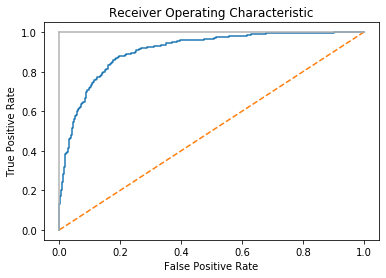

In [40]:
# ROC 곡선 그림

import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### 다중클래스 분류기 예측 평가

- _macro는 클래스별 평가 점수를 평균하는 방법을 나타냄 
- macro : 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균 
- weighted : 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균 
- micro : 클래스별 TP, TN, FP, FN을 모두 더하여 계산

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,n_features = 3,
                                       n_informative = 3,n_redundant = 0,
                                       n_classes = 3,random_state = 1)

# 로지스틱 회귀 모델 객체 생성
logit = LogisticRegression() 

# 정확도를 사용, 교차검증 수행
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


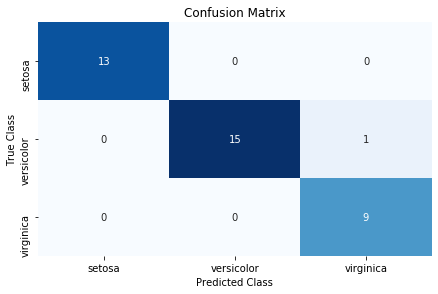

In [4]:
#분류기 성능 시각화

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris() # 데이터 로드
features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터
class_names = iris.target_names # 클래스 이름 리스트

# 훈련 세트와 테스트 세트 생성
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
# 로지스틱 회귀 모델 객체 생성
classifier = LogisticRegression()

# 모델을 훈련 및 예측 결과 계산
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# 오차 행렬 생성
matrix = confusion_matrix(target_test, target_predicted)
# 판다스 데이터프레임 생성
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues") # 히트맵 생성
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 회귀 모델 평가

- MSE는 예측값과 진짜 값 사이의 모든 거리를 제곱하여 더한 값
- MSE의 값이 클수록 전체 제곱 오차가 더 커지므로 나쁜 모델임
- 사이킷런의 scoring 매개변수값은 높은 값이 낮은 값보다 좋은 것 이어야함
- 타깃 벡터의 평균값이 1.0에 가까울수록 더 좋은 모델임
- 회귀 평가 지표 R^2는 모델이 설명하는 타깃 벡터의 분산을 측정

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터 생성
features, target = make_regression(n_samples = 100,n_features = 3,
                                   n_informative = 3,n_targets = 1,noise = 50,
                                   coef = False,random_state = 1)

#객체 생성
ols = LinearRegression()

# 음의 MSE를 사용한 교차검증 수행
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

# R^2를 사용한 교차검증 수행
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

### 군집 모델 평가

- 군집을 평가하는 방법은 클러스터의 품질을 측정하는 실루엣 계수임
- 클러스터 내 샘플간의 거리는 가깝고 클러스타 간 거리는 먼 것이 좋은 클러스터

In [22]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성
features, _ = make_blobs(n_samples = 1000,n_features = 10,centers = 2,
                         cluster_std = 0.5,shuffle = True,random_state = 1)

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측
model = KMeans(n_clusters=2, random_state=1).fit(features)
# 예측된 클래스
target_predicted = model.labels_ 
silhouette_score(features, target_predicted) 

0.8916265564072142

### 사용자 정의 평가 지표 만들기

In [10]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터 생성
features, target = make_regression(n_samples = 100,n_features = 3,random_state = 1)

# 훈련 세트와 테스트 세트 생성
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=1)


def custom_metric(target_test, target_predicted): # 사용자 정의 지표 함수를 정의
    r2 = r2_score(target_test, target_predicted) # R^2 점수를 계산
    return r2 # R^2 점수를 반환

# 높은 점수가 좋은 것을 나타내는 스코어 함수 생성
score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge() # 릿지(ridge) 회귀 모델 객체 생성

model = classifier.fit(features_train, target_train) # 릿지 회귀 모델 훈련
score(model, features_test, target_test) # 사용자 정의 스코어 함수를 적용
target_predicted = model.predict(features_test) # 예측
r2_score(target_test, target_predicted) # R^2 점수 계산

0.9997906102882058

### 훈련 세트 크기에 따른 영향 시각화

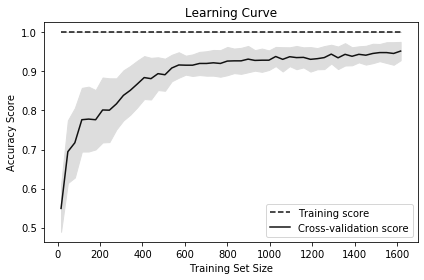

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터 분리

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수 계산
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), # 분류기
    features, # 특성 행렬
    target, # 타깃 벡터
    cv=10, # 폴드 수
    scoring='accuracy', # 성능 지표
    n_jobs=-1, # 모든 코어 사용
    train_sizes=np.linspace( 0.01, 1.0, 50)) # 50개의 훈련 세트 크기


# 훈련 세트 점수의 평균과 표준 편차를 계산.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프 그림
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역 그림
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# 그래프 출력
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()
#훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 출력합니다.
#모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움이 된다는 것을 의미합니다.

### 평가 지표 리포트 만들기

In [19]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris() # 데이터 로드
features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터

class_names = iris.target_names # 타깃 클래스 이름의 리스트
# 훈련 세트와 테스트 세트 생성
features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성
model = classifier.fit(features_train, target_train) # 모델 훈련
target_predicted = model.predict(features_test) # 예측

print(classification_report(target_test,target_predicted,target_names=class_names)) # 분류 리포트 새성

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# 분류 리포트 생성
print(classification_report(target_test, target_predicted, labels=[0,1,2,3])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 하이퍼파라미터 값의 영향 시각화

- 일부 하이퍼 라이터 값을 변경할  때 모델의 성는 변화는 검증 곡선을 그려 확인

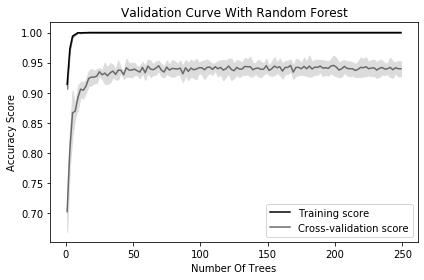

In [21]:
#트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 시각화

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터
param_range = np.arange(1, 250, 2) # 파라미터 값의 범위
# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve( RandomForestClassifier(), features,
                                             target, param_name="n_estimators",
                                             param_range=param_range, cv=3, 
                                             scoring="accuracy", n_jobs=-1)


# 훈련 세트 점수의 평균과 표준 편차를 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그림
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그림
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show() 